   CustomerID  Frequency  TotalAmountSpent
0           1         10               200
1           2         15               300
2           3         10               150
3           4          5               100
4           5          2                50
5           6         20               400
6           7         25               500
7           8         30               600
8           9         35               700
9          10         40               800


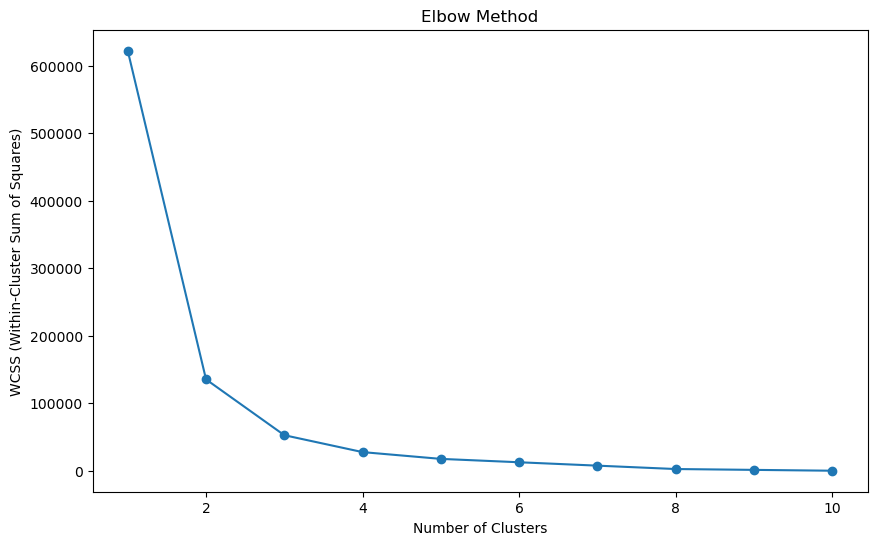

   CustomerID  Frequency  TotalAmountSpent  Cluster
0           1         10               200        2
1           2         15               300        0
2           3         10               150        2
3           4          5               100        2
4           5          2                50        2
5           6         20               400        0
6           7         25               500        0
7           8         30               600        1
8           9         35               700        1
9          10         40               800        1


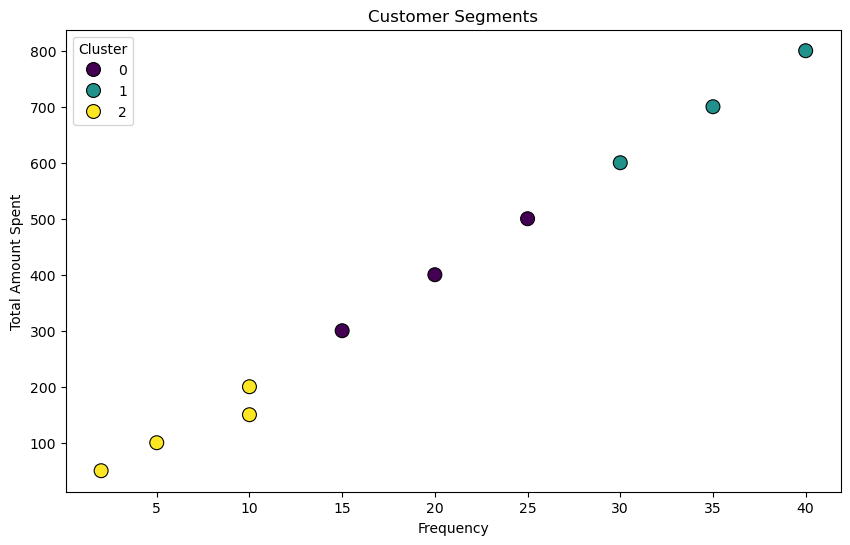

In [16]:
# Import Libraries
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Fix MKL Warning
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")

# Sample Data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Frequency': [10, 15, 10, 5, 2, 20, 25, 30, 35, 40],
    'TotalAmountSpent': [200, 300, 150, 100, 50, 400, 500, 600, 700, 800]
}
df = pd.DataFrame(data)
print(df)

# Define Features for Clustering
X = df[['Frequency', 'TotalAmountSpent']]

# Determine Optimal Number of Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Fit the K-means Model
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)
df['Cluster'] = clusters

# Print DataFrame with Cluster Assignments
print(df)

# Visualize the Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='TotalAmountSpent', hue='Cluster', data=df, palette='viridis', s=100, edgecolor='k')
plt.title('Customer Segments')
plt.xlabel('Frequency')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster')
plt.show()
